In [206]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm_notebook

import seaborn as sns

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

import yfinance as yf
from yahoofinancials import YahooFinancials

In [207]:
data_files_20 = sorted(os.listdir('analysis_data/2020/'))
data_files_21 = sorted(os.listdir('analysis_data/2021/'))
len(data_files_20), len(data_files_21)

(60, 59)

In [216]:
def data(data_files, month, year):
    data_files = [fn for fn in data_files if fn.split('_')[1] == month]
    total_df = pd.DataFrame()
    for file_name in tqdm_notebook(data_files, desc= 'Month: ' + month+', Year: '+str(year)):
        if year == 2020:
            data_df = pd.read_csv('analysis_data/2020/'+file_name, compression='xz')
        elif year == 2021:
            data_df = pd.read_csv('analysis_data/2021/'+file_name, compression='xz')
        data_df = data_df[['BaseDateTime', 'LON', 'LAT','VesselName', 'LAT_CL', 'LON_CL', 'SST']]
        total_df = pd.concat([total_df, data_df], ignore_index=True)
    print('Number of Data: ', total_df.shape)
    return total_df

In [217]:
jan_2020 = data(data_files_20, '01', 2020)
jan_2021 = data(data_files_21, '01', 2021)
feb_2020 = data(data_files_20, '02', 2020)
feb_2021 = data(data_files_21, '02', 2021)
jan_2020['SST'].isna().sum(),jan_2021['SST'].isna().sum(), feb_2020['SST'].isna().sum(), feb_2021['SST'].isna().sum()

<ipython-input-216-3545f2efe1ea>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file_name in tqdm_notebook(data_files, desc= 'Month: ' + month+', Year: '+str(year)):


Month: 01, Year: 2020:   0%|          | 0/31 [00:00<?, ?it/s]

Number of Data:  (604893, 7)


Month: 01, Year: 2021:   0%|          | 0/31 [00:00<?, ?it/s]

Number of Data:  (711947, 7)


Month: 02, Year: 2020:   0%|          | 0/29 [00:00<?, ?it/s]

Number of Data:  (579141, 7)


Month: 02, Year: 2021:   0%|          | 0/28 [00:00<?, ?it/s]

Number of Data:  (652143, 7)


(0, 0, 0, 0)

In [218]:
jan_2020['BaseDateTime'] = jan_2020['BaseDateTime'].apply(lambda x: x.split('T')[0])
feb_2020['BaseDateTime'] = feb_2020['BaseDateTime'].apply(lambda x: x.split('T')[0])
jan_2021['BaseDateTime'] = jan_2021['BaseDateTime'].apply(lambda x: x.split('T')[0])
feb_2021['BaseDateTime'] = feb_2021['BaseDateTime'].apply(lambda x: x.split('T')[0])

In [219]:
full_df = pd.concat([jan_2020, feb_2020, jan_2021, feb_2021], ignore_index=True)
# full_df[['Year','Month','Day']] = full_df['BaseDateTime'].str.split('-', n=2, expand=True)
full_df['lat_lon'] = full_df['LAT_CL'].astype(str) +'_'+full_df['LON_CL'].astype(str)
print(full_df.shape)
full_df.head()

(2548124, 8)


,BaseDateTime,LON,LAT,VesselName,LAT_CL,LON_CL,SST,lat_lon
0,2020-01-01,-119.20176,34.14870,LULAPIN,34.125,-119.225,288.252502,34.125_-119.225
1,2020-01-01,-118.45012,33.90843,LELA FRANCO,33.925,-118.475,288.329987,33.925_-118.475
2,2020-01-01,-119.26448,34.24217,DON C,34.225,-119.275,287.897491,34.225_-119.275
3,2020-01-01,-117.17606,32.71531,SPIRIT OF SAN DIEGO,32.725,-117.175,288.229980,32.725_-117.175
4,2020-01-01,-117.16639,32.70606,ANAIS,32.725,-117.175,288.229980,32.725_-117.175


In [220]:
full_df.columns

Index(['BaseDateTime', 'LON', 'LAT', 'VesselName', 'LAT_CL', 'LON_CL', 'SST',
       'lat_lon'],
      dtype='object')

### Stock data

In [221]:
# Example of input definition

filter = 'Energy'
index_name = 'SP_500'
companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies', flavor='bs4')[0]
stocks =['XOM', 'CVX', 'RDS-B','RDS-A','PTR','TTE','OGZPY','COP','BP','EQNR','ENB','PBR','PBR-A',
'EPD','TRP','EOG','CNQ','E','SLB','PXD','MPC','KMI','WMB','PSX','SU','VLO','EC','MPLX','OXY','OKE']# os.mkdir('Stock_data_csvs')
for st in tqdm_notebook(stocks):
    stock_df_2020 = yf.download(st, 
                      start='2020-01-02', 
                      end='2020-02-29', 
                      progress=False)
    stock_df_2021 = yf.download(st, 
                      start='2021-01-02', 
                      end='2021-02-28', 
                      progress=False)
    stock_df_2020.reset_index('Date', inplace=True)
    stock_df_2021.reset_index('Date', inplace=True)
    stock_df = pd.concat([stock_df_2020, stock_df_2021], ignore_index=True)
    stock_df['Date'] = stock_df['Date'].astype(str)
    stock_df[['Year', 'Month', 'Day']] = stock_df['Date'].astype(str).str.split('-', n=2, expand=True)
    stock_df['Day_Month'] = stock_df['Day'] + '_'+stock_df['Month']
    stock_df['Month_Year'] = stock_df['Month'] + '_'+stock_df['Year']
    stock_df['Date'] = stock_df['Day'] + '_' + stock_df['Month'] + '_'+stock_df['Year']
    stock_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'] ,axis=1, inplace=True)
#     stock_df.to_csv('Stock_data_csvs/'+st+'.csv',index=False)
    break

<ipython-input-221-17f7ea187525>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for st in tqdm_notebook(stocks):


  0%|          | 0/30 [00:00<?, ?it/s]

In [222]:
stock_df.head()

,Date,Close,Year,Month,Day,Day_Month,Month_Year
0,02_01_2020,70.900002,2020,01,02,02_01,01_2020
1,03_01_2020,70.330002,2020,01,03,03_01,01_2020
2,06_01_2020,70.870003,2020,01,06,06_01,01_2020
3,07_01_2020,70.290001,2020,01,07,07_01,01_2020
4,08_01_2020,69.230003,2020,01,08,08_01,01_2020


## Analysis Based On Year and Daa

In [227]:
prep_sst_data = pd.DataFrame(full_df.groupby(['BaseDateTime'])['SST'].mean())
prep_sst_data.reset_index(inplace=True)
prep_vessel_count_data = pd.DataFrame(full_df.groupby(['BaseDateTime'])['VesselName'].count())
prep_vessel_count_data.columns = ['Vessel_Count']
prep_vessel_count_data.reset_index(inplace=True)
final_df = pd.merge(prep_sst_data, prep_vessel_count_data, on= ['BaseDateTime'], how='left')
final_df[['Year','Month','Day']] = final_df['BaseDateTime'].str.split('-', n=2, expand=True)
final_df['BaseDateTime']  = pd.to_datetime(final_df['BaseDateTime'])
final_df.sort_values('BaseDateTime', inplace=True, ignore_index=True)

max_sst = final_df['SST'].max()
final_df['SST_norm'] = final_df['SST'].apply(lambda x: x/max_sst)

max_vc = final_df['Vessel_Count'].max()
final_df['Vessel_Count_norm'] = final_df['Vessel_Count'].apply(lambda x: x/max_vc)

final_df['Day_Month'] = final_df['Day'] + '_'+final_df['Month']
final_df['Month_Year'] = final_df['Month'] + '_'+final_df['Year']
final_df['Date'] = final_df['Day'] + '_' + final_df['Month'] + '_'+final_df['Year']

final_df = pd.merge(final_df, stock_df[['Date', 'Close']], on= 'Date', how='left')
final_df['Close'].interpolate(inplace=True)
final_df['Close'][0] = final_df['Close'][1]

# max_stock = final_df['Close'].max()
# final_df['Close'] = final_df['Close'].apply(lambda x: x/max_stock)

final_df.head()

<ipython-input-227-1de0b865cf01>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Close'][0] = final_df['Close'][1]


,BaseDateTime,SST,Vessel_Count,Year,Month,Day,SST_norm,Vessel_Count_norm,Day_Month,Month_Year,Date,Close
0,2020-01-01,288.209786,18291,2020,01,01,0.998532,0.762030,01_01,01_2020,01_01_2020,70.900002
1,2020-01-02,288.154167,18173,2020,01,02,0.998339,0.757114,02_01,01_2020,02_01_2020,70.900002
2,2020-01-03,288.293218,18914,2020,01,03,0.998821,0.787985,03_01,01_2020,03_01_2020,70.330002
3,2020-01-04,288.335448,19403,2020,01,04,0.998967,0.808357,04_01,01_2020,04_01_2020,70.510002
4,2020-01-05,288.335607,18837,2020,01,05,0.998968,0.784777,05_01,01_2020,05_01_2020,70.690002


In [228]:
print('Average Vessel count in 2020: ', final_df[final_df['Year'] == '2020']['Vessel_Count'].mean())
print('Average Vessel count in 2021: ', final_df[final_df['Year'] == '2021']['Vessel_Count'].mean())
print('Average Sea Surface Temperature in 2020: ', final_df[final_df['Year'] == '2020']['SST'].mean())
print('Average Sea Surface Temperature in 2021: ', final_df[final_df['Year'] == '2021']['SST'].mean())

Average Vessel count in 2020:  18178.016666666666
Average Vessel count in 2021:  20596.84745762712
Average Sea Surface Temperature in 2020:  288.241875812386
Average Sea Surface Temperature in 2021:  287.25611566426045


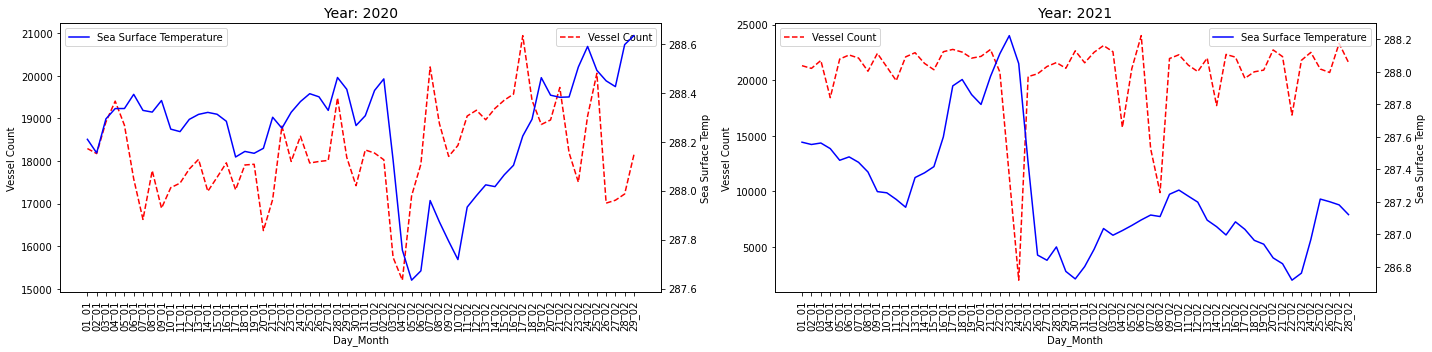

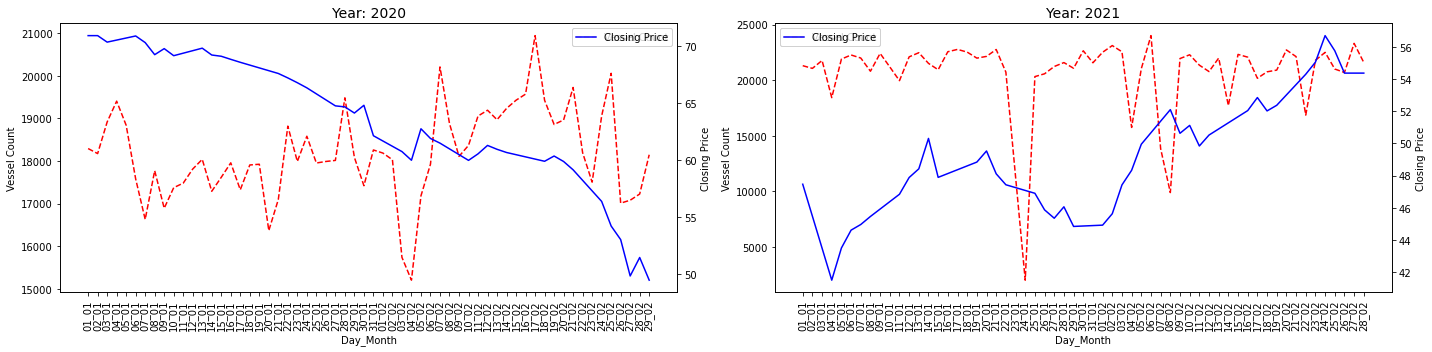

In [229]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.lineplot(data=final_df[final_df['Year'] == '2020'], x='Day_Month', y='Vessel_Count',
             linestyle='--',color='red',label='Vessel Count' )
plt.ylabel('Vessel Count')
plt.xticks(rotation=90)
ax2 = plt.twinx()
sns.lineplot(data=final_df[final_df['Year'] == '2020'], x='Day_Month', y='SST',
             color = 'blue', label = 'Sea Surface Temperature')
plt.ylabel('Sea Surface Temp')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.title('Year: 2020', fontsize=14)
plt.subplot(122)
sns.lineplot(data=final_df[final_df['Year'] == '2021'], x='Day_Month', y='Vessel_Count',
             linestyle='--',color='red',label='Vessel Count' )
plt.ylabel('Vessel Count')
plt.xticks(rotation=90)
ax2 = plt.twinx()
sns.lineplot(data=final_df[final_df['Year'] == '2021'], x='Day_Month', y='SST',
             color = 'blue', label = 'Sea Surface Temperature')
plt.ylabel('Sea Surface Temp')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.title('Year: 2021', fontsize=14)
plt.show()

## Stock with Vessel Data
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.lineplot(data=final_df[final_df['Year'] == '2020'], x='Day_Month', y='Vessel_Count',
             linestyle='--',color='red',label='Vessel Count' )
plt.ylabel('Vessel Count')
plt.xticks(rotation=90)
ax2 = plt.twinx()
sns.lineplot(data=final_df[final_df['Year'] == '2020'], x='Day_Month', y='Close',
             color = 'blue', label = 'Closing Price')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.title('Year: 2020', fontsize=14)
plt.subplot(122)
sns.lineplot(data=final_df[final_df['Year'] == '2021'], x='Day_Month', y='Vessel_Count',
             linestyle='--',color='red',label='Vessel Count' )
plt.ylabel('Vessel Count')
plt.xticks(rotation=90)
ax2 = plt.twinx()
sns.lineplot(data=final_df[final_df['Year'] == '2021'], x='Day_Month', y='Close',
             color = 'blue', label = 'Closing Price')
plt.ylabel('Closing Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.title('Year: 2021', fontsize=14)
plt.show()

